In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from perceptron import *
from banditron import *

## `Iris` dataset

In [2]:
iris = tfds.as_dataframe(tfds.load('iris', split='train', shuffle_files=True).repeat(100)).to_numpy()
np.random.shuffle(iris)
X_iris = np.array([x.tolist()/np.linalg.norm(x) for x in iris[:,0]])
y_iris = iris[:,1].astype(int)

plt.rcParams["figure.figsize"] = (8,6)

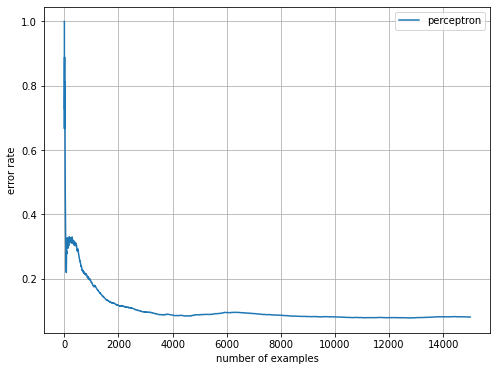

In [3]:
log_perceptron_iris = perceptron(X_iris,y_iris,3)
rate_perceptron_iris = log_perceptron_iris/np.array([x+1 for x in range(len(X_iris))])
x = range(1,len(X_iris)+1)
plt.ylabel('error rate')
plt.xlabel('number of examples')
plt.plot(x,rate_perceptron_iris)
plt.grid()
plt.legend(['perceptron'], loc='upper right')
plt.show()

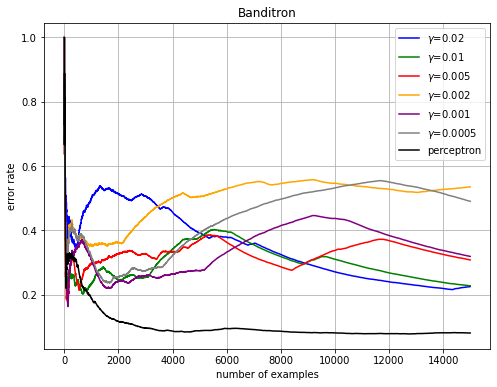

In [4]:
plt.title("Banditron")
plt.ylabel('error rate')
plt.xlabel('number of examples')
plt.grid()

gammas = [0.02,0.01,0.005,0.002,0.001,0.0005]
colors = ["blue","green","red","orange","purple","grey"]
for gamma,color in zip(gammas,colors):
    log = banditron(X_iris,y_iris,3,gamma=gamma)
    gammas_rate_iris = log/np.array([x+1 for x in range(15000)])
    x = range(1,15001)
    plt.plot(x,gammas_rate_iris,color=color)
plt.plot(x,rate_perceptron_iris,"black")
plt.legend(["$\gamma$="+str(x) for x in gammas]+["perceptron"], loc='upper right')
plt.show()

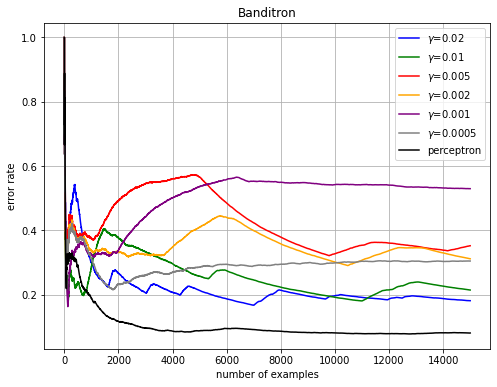

In [5]:
plt.title("Banditron")
plt.ylabel('error rate')
plt.xlabel('number of examples')
plt.grid()

gammas = [0.02,0.01,0.005,0.002,0.001,0.0005]
colors = ["blue","green","red","orange","purple","grey"]
for gamma,color in zip(gammas,colors):
    log = banditron(X_iris,y_iris,3,gamma=gamma)
    gammas_rate_iris = log/np.array([x+1 for x in range(15000)])
    x = range(1,15001)
    plt.plot(x,gammas_rate_iris,color=color)
plt.plot(x,rate_perceptron_iris,"black")
plt.legend(["$\gamma$="+str(x) for x in gammas]+["perceptron"], loc='upper right')
plt.show()

## `Wine` dataset

In [7]:
wine = tfds.as_dataframe(tfds.load('wine_quality', split='train', shuffle_files=True).repeat(10)).to_numpy()
X_wine = np.array([x / np.linalg.norm(x) for x in wine[:,0:-1]])
y_wine = wine[:,-1].astype(int) - 3

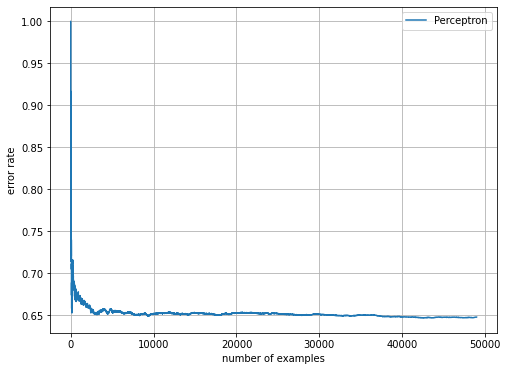

In [8]:
log_perceptron_wine = perceptron(X_wine,y_wine,7)
rate_perceptron_wine = log_perceptron_wine/np.array([x+1 for x in range(len(X_wine))])
x = range(1,len(X_wine)+1)
plt.ylabel('error rate')
plt.xlabel('number of examples')
plt.plot(x,rate_perceptron_wine)
plt.grid()
plt.legend(['Perceptron'], loc='upper right')
plt.show()

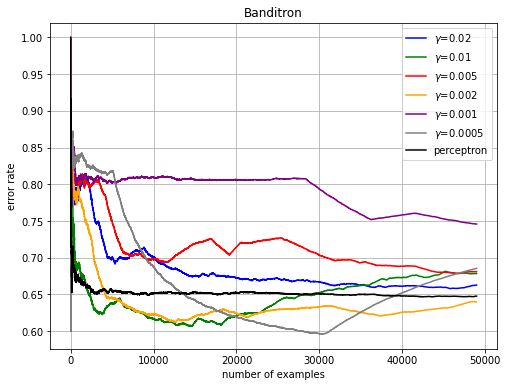

In [10]:
plt.title("Banditron")
plt.ylabel('error rate')
plt.xlabel('number of examples')
plt.grid()

gammas = [0.02,0.01,0.005,0.002,0.001,0.0005]
colors = ["blue","green","red","orange","purple","grey"]
for gamma,color in zip(gammas,colors):
    log = banditron(X_wine,y_wine,7,gamma=gamma)
    gamma_rate_wine = log/np.array([x+1 for x in range(len(X_wine))])
    x = range(1,len(X_wine)+1)
    plt.plot(x,gamma_rate_wine,color=color)

plt.plot(x,rate_perceptron_wine, color="black")

plt.legend(["$\gamma$="+str(x) for x in gammas] + ['perceptron'], loc='upper right')
plt.show()

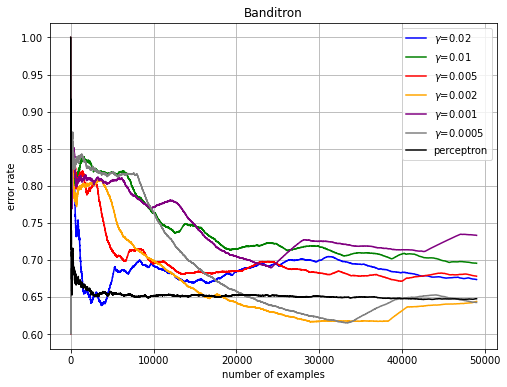

In [11]:
plt.title("Banditron")
plt.ylabel('error rate')
plt.xlabel('number of examples')
plt.grid()

gammas = [0.02,0.01,0.005,0.002,0.001,0.0005]
colors = ["blue","green","red","orange","purple","grey"]
for gamma,color in zip(gammas,colors):
    log = banditron(X_wine,y_wine,7,gamma=gamma)
    gamma_rate_wine = log/np.array([x+1 for x in range(len(X_wine))])
    x = range(1,len(X_wine)+1)
    plt.plot(x,gamma_rate_wine,color=color)

plt.plot(x,rate_perceptron_wine, color="black")

plt.legend(["$\gamma$="+str(x) for x in gammas] + ['perceptron'], loc='upper right')
plt.show()